# Step 1 : Data Analysis and Preparation

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [59]:
data = pd.read_csv("/Users/darshdahate/Downloads/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Step 2 : Exploratory Data Analysis(EDA)

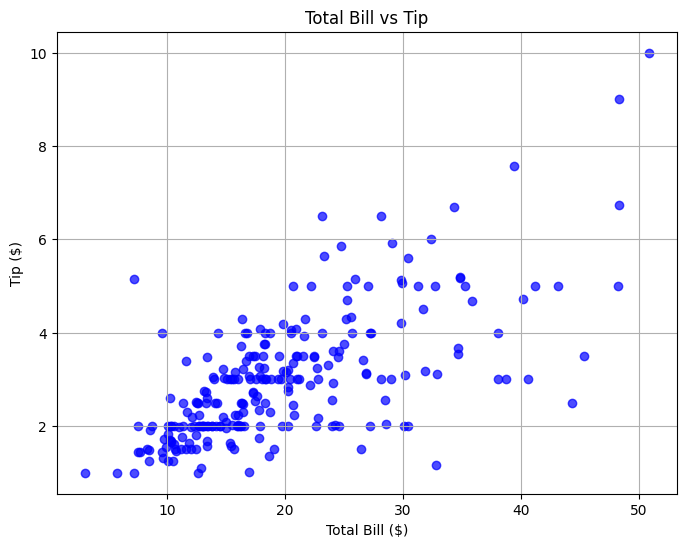

In [60]:
# Scatter plot of total_bill vs. tip
plt.figure(figsize=(8, 6))
plt.scatter(data['total_bill'], data['tip'], color='blue', alpha=0.7)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.grid(True)
plt.show()

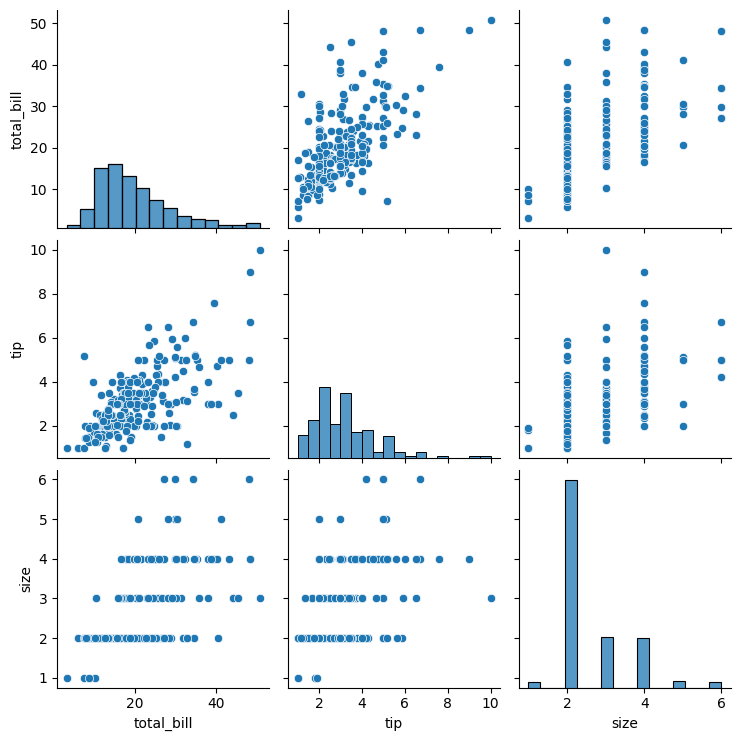

In [61]:
num_df=data.select_dtypes(include=[np.number])
sns.pairplot(num_df)
plt.show()

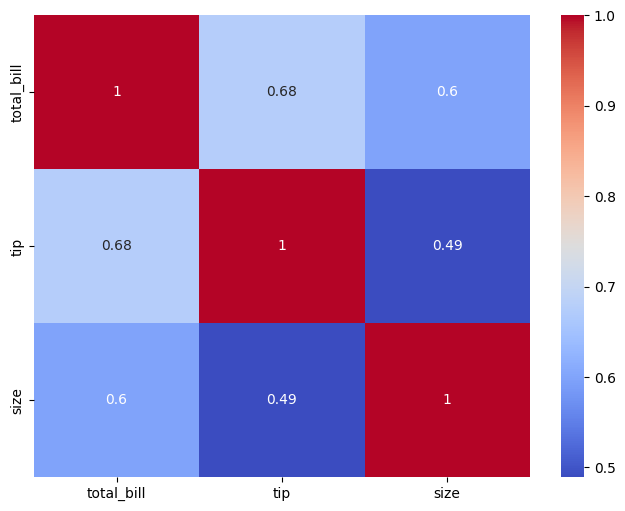

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [63]:
# Linearity Check: Rainbow Test
X = data[['total_bill', 'size']]
y = data['tip']
X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(linear_model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.1902656646832823, p-value: 0.17048935693447384


Rainbow Test Statistic: 1.19
p-value: 0.17

The p-value is greater than 0.05, so we fail to reject the null hypothesis, suggesting the model is adequately specified and there is no significant misspecification.

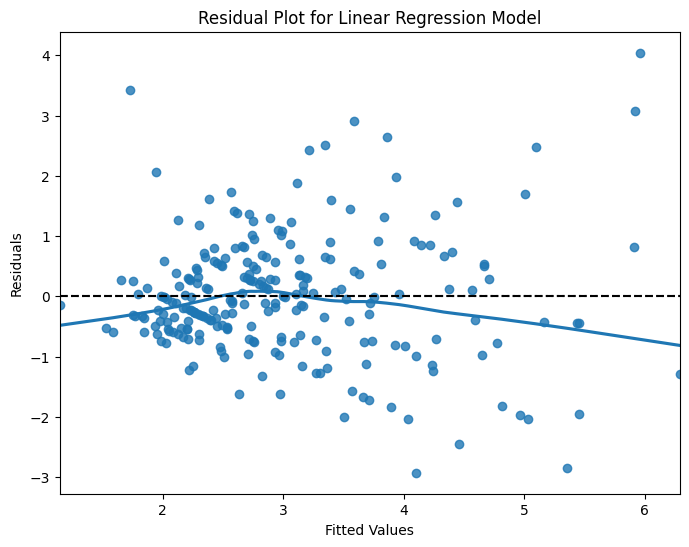

In [64]:
# Residuals Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=linear_model.fittedvalues, y=linear_model.resid, lowess=True, )
plt.title("Residual Plot for Linear Regression Model")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.show()

# Step 3 : Model Building and Evaluation

In [65]:
# Features and target variable
features = data[['total_bill']]
target = data['tip']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [66]:
# Define regression models
model_list = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100)),
    ("SVR", SVR(kernel='rbf')),
    ("KNN", KNeighborsRegressor(n_neighbors=5))
]

In [67]:
# Initialize results list
evaluation_results = []

# Loop through models and evaluate performance
for model_name, model_instance in model_list:
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model_instance.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    # Store results in dictionary format
    model_performance = {
        "Model": model_name,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse
    }
    
    evaluation_results.append(model_performance)

In [ ]:
# Convert results into a DataFrame and display
results_dataframe = pd.DataFrame(evaluation_results)
results_dataframe.head()

,Model,R² Score,MAE,MSE
0,Linear Regression,0.544938,0.620858,0.568814
1,Ridge Regression,0.544946,0.620860,0.568805
2,Lasso Regression,0.546215,0.621281,0.567219
3,Decision Tree,-0.068983,0.949592,1.336198
4,Random Forest,0.253473,0.787196,0.933137


In [69]:
# Identify the best model based on R² Score
best_model_info = results_dataframe.loc[results_dataframe['R² Score'].idxmax()]
best_model_name = best_model_info['Model']

# Display the result
print(f"\nModel with the highest R² Score: {best_model_name}")


Model with the highest R² Score: Lasso Regression


# Step 4 : Conclusion

1. Lasso Regression achieved the highest R² score of 0.546, making it the most effective model for predicting the tip based on the total bill.

2. Ridge Regression and Linear Regression also performed well with R² scores close to 0.545, but slightly lower than Lasso.

3. Random Forest had a moderate R² score of 0.240, indicating room for improvement.

4. Decision Tree performed poorly, with a negative R² score of -0.069, suggesting model misspecification or overfitting.

5. Lasso Regression showed the best overall performance in terms of R², MAE, and MSE.

6. Further tuning and feature engineering could potentially improve the performance of models like Random Forest and Decision Tree